## WEEK 2:

Bu hafta iki yeni kavramı hakkında konuşacağız: istatistiksel yanlılık (statistical bias) ve özellik önemi (feature importance). Bu kavramlar, verilerinizi ve verilerinizin kalitesini daha iyi anlamanızı sağlar. Bu kavramlar aynı zamanda veri kümelerinizin bireysel özelliklerinin son modele nasıl katkıda bulunduğunu keşfetmenize olanak tanır.



Yüksek kaliteli makine öğrenimi modelleri, yüksek kaliteli eğitim verileri gerektirir. Modelleriniz yalnızca üzerinde eğitildikleri veriler kadar iyi olacaktır. Bu hafta, istatistiksel yanlılık kavramını nasıl tanımlayacağınızı anlayacak ve veri kümelerindeki dengesizlikleri ölçmek için metrikleri nasıl kullanacağınızı öğreneceksiniz.



Verilerinizdeki istatistiksel yanlılığı nasıl tespit edeceğinizi ve yanlılık raporları oluşturmayı öğreneceksiniz. Veri kümenizdeki bireysel özelliklerin nihai modele nasıl katkıda bulunduğunu anlamanızı sağlayacak özellik önem raporlarının nasıl oluşturulacağını daha fazla keşfedeceksiniz.


#### Machine Learning Workflow

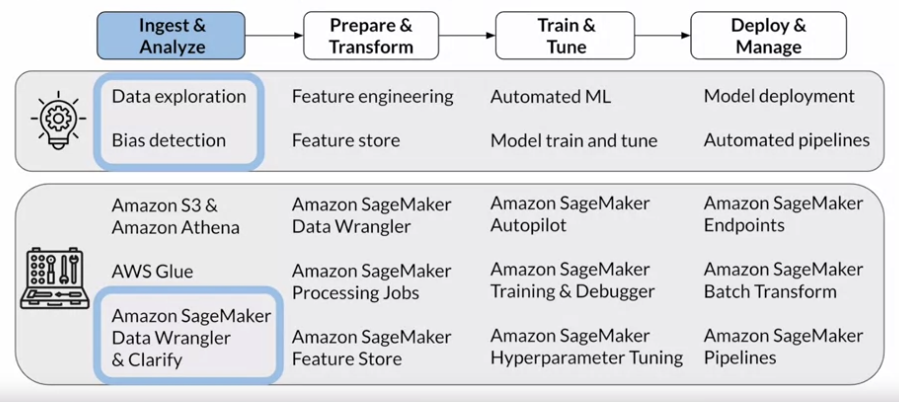

### Statictical Bias

Peki istatistiksel yanlılık nedir? Bir veri seti, altta yatan problem alanını tamamen ve doğru bir şekilde temsil edemiyorsa, biaslı olarak kabul edilir. İstatistiğe aşina olanlarınız için, istatistiksel yanlılığın bir istatistiğin bir parametreyi olduğundan fazla veya az tahmin etme eğilimi olduğunu bilirsiniz. Bu hafta, eğitim veri kümesindeki istatistiksel önyargıları öğreneceksiniz, bu da eğitim veri kümesinde dengesizliklere işaret eder. Bu önyargılı veri kümelerinde, bir veri kümesinin bazı öğeleri diğerlerinden daha ağırlıklı olarak temsil edilir. Örneğin, bir finansal hizmetler modeli oluşturmaya çalışıyorsanız ve dolandırıcılığı tespit edebilecek bir model (fraud detection) oluşturmak istiyorsanız, modeli oluşturmak için kullanacağınız eğitim verisi, bir işletmenin erişimine sahip olduğu önceki kredi kartı işlemlerinin bir kümesi olacaktır. Çoğu zaman kredi kartı işlemleri şüpheli değildir, bu işletme için gerçekten iyi bir durumdur. Ancak bu yanlı veri kümesini dolandırıcılığı tespit etmek için eğitim verisi olarak kullanıyorsanız, modelinizin şüpheli işlemleri tespit etme olasılığı çok düşüktür çünkü daha önce yeterli miktarda şüpheli işlem görmemiştir. Bu sorunu çözmenin bir yolu, eğitim veri kümenize daha fazla şüpheli işlem örneği eklemektir. Biaslı veri kümeleri genellikle biaslı modellere yol açar ve biaslı modeller, bu modelleri kullanan işletmeler için hem iş hem de düzenleme sonuçlarına sahip olabilir. Başka bir örnek verelim. Ürün inceleme veri kümesi oluşturalım. Bu tür bir veri kümesi, örneğin A ürün kategorisine aşırı derecede büyük bir sayıda incelemeler içerirken, diğer kategoriler olan B ve C ürün kategorileri için daha az sayıda inceleme içerebilir. Bu biaslı veri kümesiyle ürün sentiment tahmin modeli oluşturduğunuzda, sonuçta oluşan model yeni A ürün kategorisine ait ürünlerin duygusunu oldukça doğru bir şekilde tespit edebilir. Ancak diğer kategorilere ait yeni ürünler için, örneğin B ve C ürün kategorileri için, duygu modeliniz çok doğru olmayacaktır.

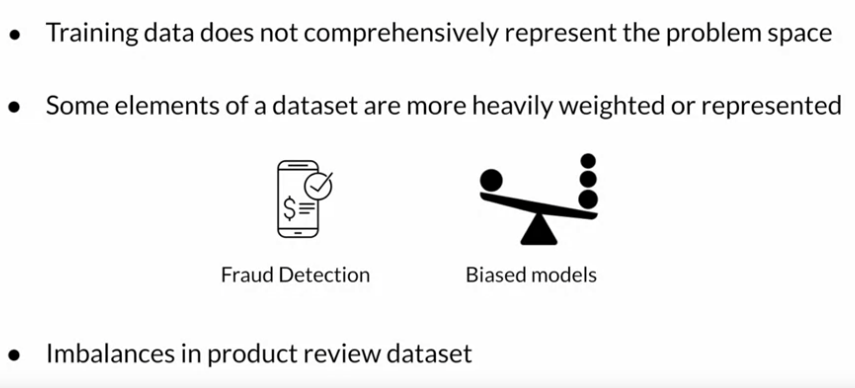

### Statistical Bias Causes

İstatistiksel yanlılık nasıl oluşur?

- Yanlılık, veri kümelerine birden çok nedenle girebilir. İlk nedenimiz `activity bias`tır. Bu, özellikle sosyal medyada oluşturulan insan tarafından üretilen içeriklerde mevcut olan yanlılıktır. Sosyal medya platformları üzerindeki yıllar boyunca toplanan tüm verileri düşünün. Gerçek şu ki, nüfusun çok küçük bir yüzdesi bu sosyal medya platformlarında aktif olarak yer almaktadır. Bu nedenle, bu platformlardaki yıllar boyunca toplanan veriler tüm nüfusu temsil etmiyor.

- 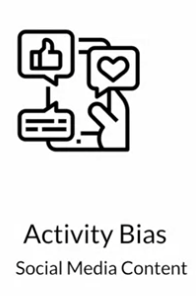

- İkinci nedenimiz çok benzer ama biraz farklı. Bu, `societal bias`tır. Yine, insanlar tarafından oluşturulan verilerdeki yanlılıklar, belki sadece sosyal medya değil, toplumda mevcut olan önceden var olan düşüncelerden kaynaklanabilir. İnsanlar tarafından üretilen veriler yanlı olabilir çünkü hepimizin bilinçaltında önyargılarımız vardır.

- 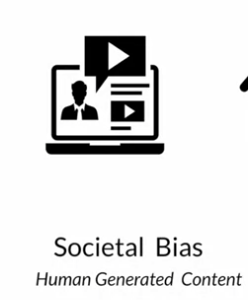

- Bias, bazen makine öğrenme sistemi tarafından da oluşturulabilir. Örneğin, bir makine öğrenme uygulaması kullanıcılara birkaç seçenek sunar ve kullanıcı bir seçenek seçtiğinde, kullanıcı seçimi daha fazla eğitim verisi olarak kullanılır ve modeli daha da eğitmek ve iyileştirmek için kullanılır. Bu geri besleme döngüsü yanlı seçim örneği `(selection bias)` oluşturabilir. Bir akış hizmetini ele alalım. Akış hizmetinde bir film izlemek istiyorsunuz ve akış hizmeti size birkaç öneri sunar ve siz de Dancing with Wolves adlı bir filmi izlemeye karar verirsiniz ve filme yüksek bir puan verirsiniz. Bundan sonra, akış hizmeti size kurt olan filmleri öneriyor olabilir. Bu kısmen hizmete verdiğiniz geri bildirimden kaynaklanmaktadır. Ama aslında belki o filmi izlediniz çünkü oyuncuları seviyorsunuz ve kurtlardan özellikle hoşlanmıyorsunuz. Bu tür durumlar, model tüketici ve makine öğrenme modeli arasında geri besleme döngüsü içeren bir yanlı seçim örneği sonucunda oluşabilir. Veri kümelerinizde potansiyel olarak meydana gelebilecek tüm bu sorunlarla birlikte, modelinizi eğitmeden önce ve sonra verilerinizde yaygın olan çeşitli yanlılıkları ve dengesizlikleri sürekli olarak izlemek ve tespit etmek son derece önemlidir.

- 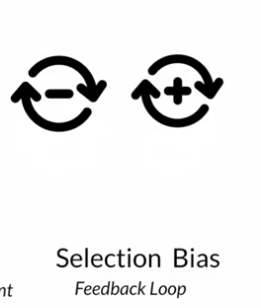

- Eğitim verilerinizdeki istatistiksel önyargıları tespit etseniz bile, model eğitildikten ve dağıtıldıktan sonra veri kaymasının `(data drift)` meydana gelme olasılığı hala vardır. Veri kayması, özellikle veri dağılımının başlangıçta modelin eğitiminde kullanılan eğitim veri setinin dağılımından önemli ölçüde farklı olduğu durumlarda meydana gelir. Bu duruma veri kayması `data drift` veya veri değişimi `data shift` denir. Veri kaymasının birkaç farklı çeşidi vardır. Bağımsız değişkenlerin veya veri kümenizi oluşturan özelliklerin dağılımının değişmesi durumuna kovaryant kayması `covariant drift` denir. Etiketlerin veya hedef değişkenlerin veri dağılımının değişmesi ise önceki olasılık kayması`prior probability drift`dır. Ayrıca, özellikler ile etiketler arasındaki ilişkinin değişmesine konsept kayması `concept drift` denir. Konsept kayması veya konsept değişikliği, etiketin tanımının yaş veya coğrafi konum gibi belirli bir özellikle değiştiği durumda meydana gelebilir.

- Örneğin, sizin deneyiminizde olduğu gibi, farklı bölgelerdeki farklı adlandırmalar, veri kayması örneklerine güzel bir örnek olabilir. Farklı coğrafi bölgelerdeki farklı kavramlar, etiketlerin tanımının değiştiği bir veri kayması örneği oluşturabilir.

- Tüm bu potansiyel veri kayması sorunları göz önüne alındığında, eğitim verilerinizdeki yanlılıkları ve dengesizlikleri sürekli olarak izlemek ve tespit etmek son derece önemlidir. Bu tür tespitleri düzenli olarak yapmak, modelinizi güncel ve doğru tutmanıza ve olası veri kayması veya bias sorunlarına hızlı bir şekilde yanıt vermenize yardımcı olacaktır.

- 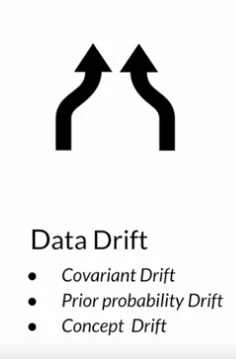



### Measuring Statistical Bias

- Şimdi, veri setinizdeki istatistiksel yanlılıkları ve dengesizlikleri anladınız ve bu dengesizliklere yol açabilecek bazı nedenleri anladınız. Şimdi, belirli metrikleri kullanarak veri setinizdeki bu dengesizlikleri ve istatistiksel yanlılıkları ölçmeye hazırsınız. Bu metrikler, veri setinizin belirli bir tarafına `(facet)` uygulanabilir. Bir taraf `(facet)`, veri setinizde analiz yapmak istediğiniz hassas bir özelliktir. Örneğin, ürün inceleme veri setinde, bir ürün kategorisi bir facet veya ilgilendiğiniz bir feature olabilir ve bu feature için dengesizlikleri analiz etmek isteyebilirsiniz.

- İlk tanıtacağımız metrik, sınıf dengesizliğidir `(Class Imbalance (CI))`. Bu oldukça basit bir şekilde anlaşılabilir. Sınıf dengesizliği, veri setinizdeki farklı facet değerleri için verilen örnek sayısındaki dengesizliği ölçer. Ürün inceleme veri setine uygulandığında, bu metrik, belirli bir ürün kategorisi (örneğin Ürün Kategorisi A) diğer kategorilere göre toplam inceleme sayısında orantısız bir şekilde büyük müdür sorusuna cevap verir.

- 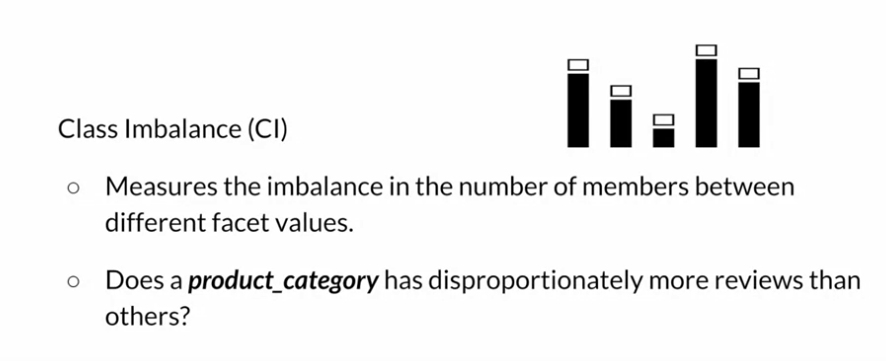

- İkinci tanıtacağımız metrik, `Difference in Proportions of Labels` DPL'dir (Label Proportions Farkı). Bu metrik, farklı facet değerleri arasındaki olumlu sonuçların dengesizliğini ölçer. Ürün inceleme veri setine uygulandığında, bu metrik, belirli bir ürün kategorisi (örneğin Ürün Kategorisi A) diğer kategorilere göre orantısız derecede daha yüksek derecelendirme alıyor mu sorusuna cevap verir. Yani CI metriğinin verilen bir kategorinin toplam inceleme sayısını ölçerken, DPL metriği aslında o kategorinin diğer ürün kategorilerinden daha yüksek derecelendirmelere sahip olup olmadığını inceler.

- 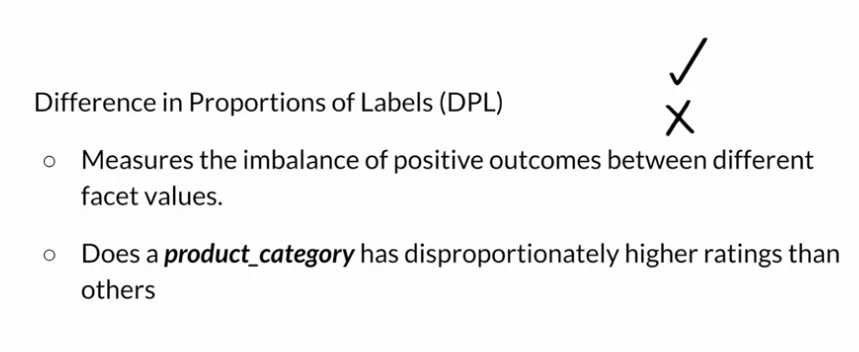





### Detecting Statistical Bias

- Şimdi, istatistiksel biası tespit etmede yardımcı olabilecek iki farklı araçtan bahsedeceğim: `SageMaker Data Wrangler` ve `SageMaker Clarify`. İlk olarak, `Data Wrangler`'ı tanıtacağım.


##### Detect Statistical Bias - Amazon SageMaker Data Wrangler

- `Data Wrangler`, verileriniz için farklı kaynaklara bağlanmanıza, verileri görselleştirmenize ve dönüştürmenize olanak sağlar. `Data Wrangler` ortamında bir dizi dönüşüm uygulayarak verilerinizi dönüştürebilir ve verilerinizdeki istatistiksel yanlılıkları tespit edebilirsiniz. Ayrıca, eğitim veri kümenizde özellik önem `feature importance` hesaplamaları yapma imkanı da sağlar.

- 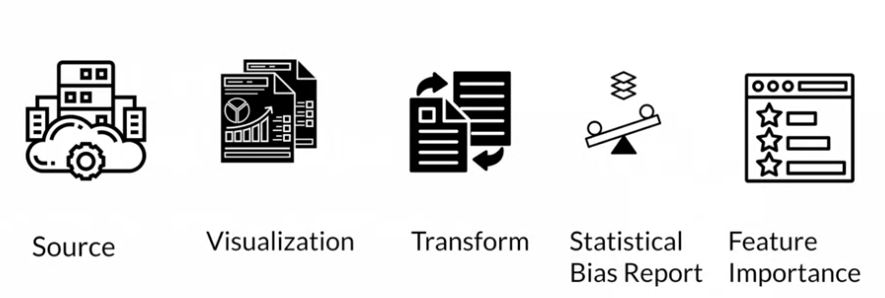

- Bu bölümde, istatistiksel bias tespit etme ve eğitim veri kümelerinde bias raporları oluşturma `detect statistical bias and generate bias reports` yeteneğine odaklanacağız.

- 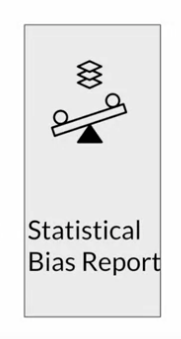


##### Detect Statistical Bias - Amazon SageMaker Clarify

- SageMaker Clarify, eğitim veri kümelerinizde istatistiksel yanlılık tespiti yapabilir ve yanlılık raporları oluşturabilir. Ayrıca, eğitilmiş ve dağıtılmış modellerde yanlılık tespiti yapabilir. Ayrıca, makine öğrenimi açıklanabilirliği sağlama ve veri ve modellerde kayma tespiti yapma yetenekleri de sunar.

- 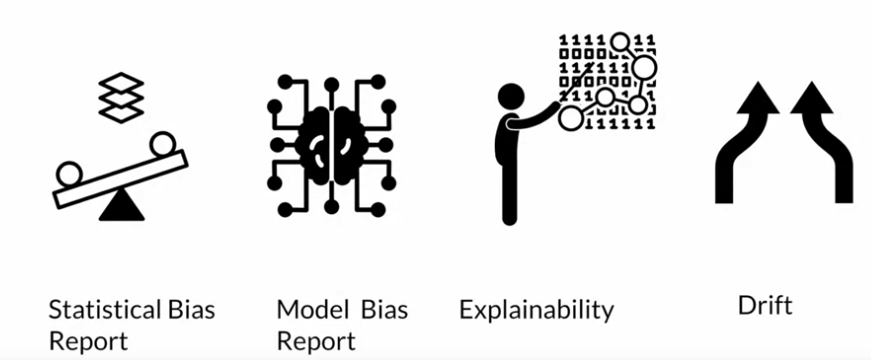


- Şimdilik, Clarify'ın istatistiksel bias tespiti ve rapor oluşturma yeteneklerine odaklanacağız.

- 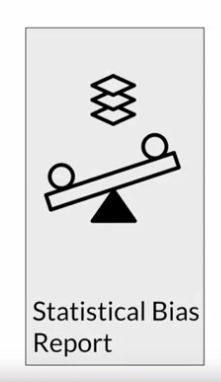

- Clarify API'larını kullanmaya başlamak için öncelikle SageMaker SDK'dan Clarify kütüphanesini içe aktarın. Clarify kütüphanesine sahip olduktan sonra, kütüphaneyi kullanarak SageMaker Clarify Processor nesnesini oluşturun. SageMaker Clarify Processor, bias tespit sürecini dağıtılmış bir küme olarak ölçeklendirmenizi sağlayan bir yapıdır. İki parametre kullanarak, örneğin türü (instance type) ve örnek sayısı (instance count), dağıtılmış küme kapasitesini ihtiyacınıza göre ölçeklendirebilirsiniz. Örnek sayısı, kümedeki düğüm sayısını temsil eder ve örnek türü, kümedeki her bir bireysel düğümün işlem kapasitesini, belleğini ve ağı ölçer. Dağıtılmış kümeyi yapılandırdıktan sonra, bir sonraki adım olarak, bias raporunun kaydedileceği bir S3 konumu belirtmelisiniz. Bu parametre "bias report output path" olarak belirtilir.

- 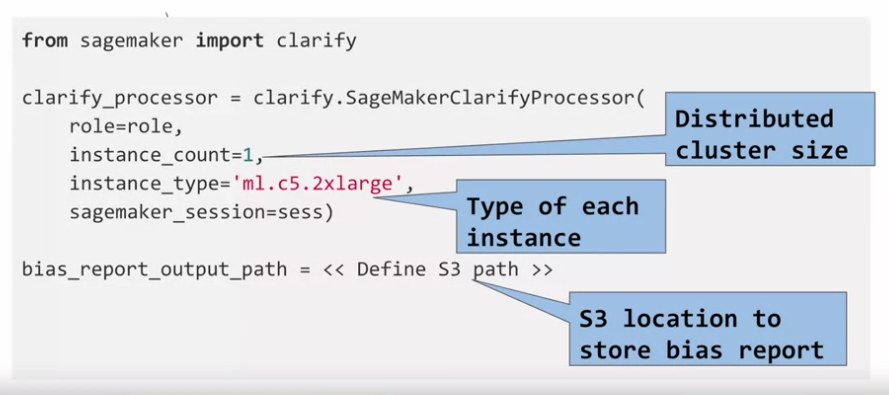

- Bu adım tamamlandığında, bir sonraki adım Clarify kütüphanesinde veri yapılandırma nesnesini yapılandırmaktır. Veri yapılandırma nesnesi, verinizle ilgili ayrıntıları temsil eder. Bu nedenle, verinizin S3'teki giriş ve çıkış konumlarına ve o veri kümesini kullanarak tahmin etmeye çalıştığınız etikete sahiptir. Bu durumda, tahmin etmeye çalıştığımız etiket "sentiment" (duygusal durum) olacaktır.

- 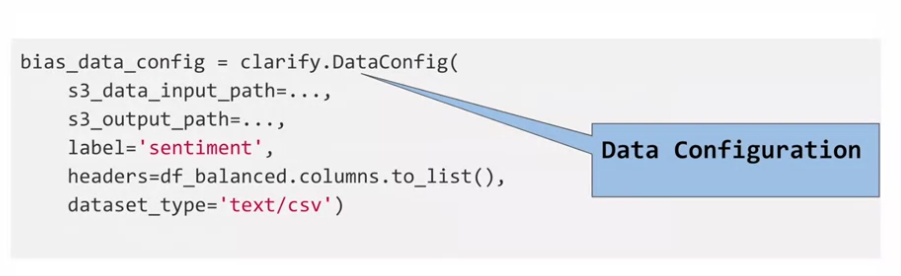

- Sonraki adım, Clarify kütüphanesindeki bias config nesnesini yapılandırmaktır. Bias config nesnesi, bir faseti veya incelenen özellik adını yakalar. Bu durumda, ürün kategorisi özelliğindeki dengesizlikleri bulmaya çalışıyorsunuz. Label values veya threshold parametresi, etiket için istenen değerleri tanımlar. Yani, eğer sentiment (duygusal durum) özelliği etiketinizse, bu etiket için istenen değeri bu parametreye eklersiniz.

- 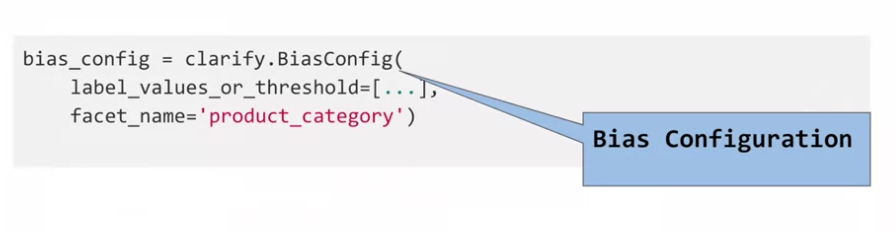

- Bu üç nesneyi yapılandırdıktan sonra, Clarify işlemcisinde ön eğitim öncesi bias yöntemini çalıştırmaya hazırsınız. Zaten yapılandırdığınız veri yapılandırması ve veri bias yapılandırması yanı sıra, biasi belirlemek için öğrendiğiniz metrikleri de değerlendirmek için metodları belirtebilirsiniz. Bu yöntemler, zaten öğrendiğiniz gibi, CI (sınıf dengesizliği) ve DPL (Etiketlerin Oranları Arasındaki Fark) gibi metriklerdir. Ayrıca burada birkaç başka yöntem de belirtebilirsiniz. Wait parametresi, bu bias tespit işleminin diğer kodunuzu engellemesi gerekip gerekmediğini belirtir. Benzer şekilde, logs parametresi, günlükleri yakalayıp yakalamayacağınızı belirtir. Ön eğitim öncesi bias yöntemi yapılandırması tamamlandığında, bu işlemi başlatırsınız.


- 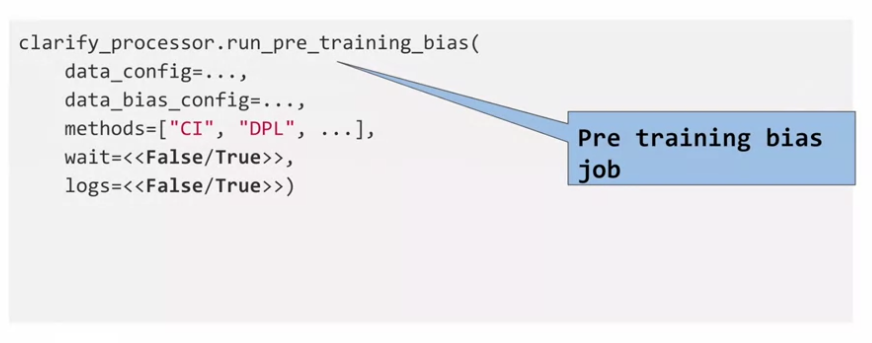

#### Amazon SageMaker Processing

- SageMaker Clarify, arka planda, ölçekte bias tespiti gerçekleştirmek için SageMaker Processing Job adı verilen bir yapı kullanıyor. SageMaker Processing Job, ölçekte herhangi bir veriyle ilgili görevi gerçekleştirmenize izin veren bir yapıdır. Bu görevler, ön işleme veya son işleme görevlerini yürütmek veya hatta verileri modelinizi değerlendirmek için kullanmak olabilir. Görselde gördüğünüz gibi, SageMaker Processing Job verilerin bir S3 bucketında olmasını bekler. Veriler, bu işlem kümesindeki çeşitli konteynerler içeren bir işlem kümesinde toplanır ve işlenir. Varsayılan olarak Sklearn, Python vb. desteklenir. Ayrıca kendi özel konteynerinizi `(custom container)` de kullanma şansına sahip olabilirsiniz. İşlem kümesi, verileri işledikten sonra, dönüştürülmüş veya işlenmiş verileri S3 bucket'a geri koyar.

- 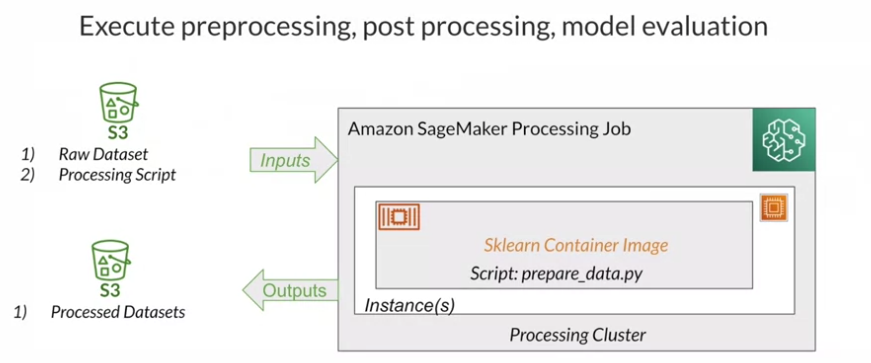

- Clarify API'larını nasıl kullanacağınızı ve arkada neler olup bittiğini artık anladınız. Peki, bu "run pre-training bias" işlemini gerçekleştirdiğinizde ne olacağını düşünüyorsunuz? Sonuç olarak, veri kümenizdeki yanlılık hakkında çok detaylı bir rapor elde edeceksiniz ve bu rapor S3 bucket'ta saklanacak. Bu raporu indirebilir ve veri davranışını anlamak için detaylı bir şekilde inceleyebilirsiniz.

- 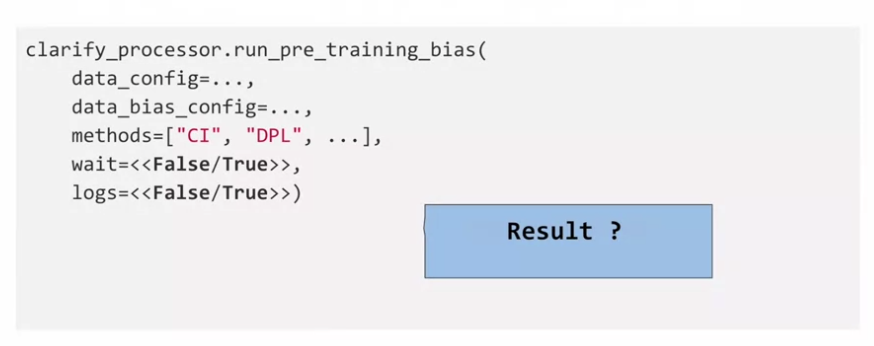

### Approaches to statistical bias detection
#### Detecting Statistical Bias - Two Approaches

- İki araç öğrendiniz: `SageMaker Data Wrangler` ve `SageMaker Clarify`. Şimdi soru şu: `Bu araçlardan hangisini hangi durumlarda kullanmalısınız? ` İlk seçenek olan Data Wrangler, size daha çok bir UI tabanlı görsel deneyim sunar. Bu nedenle, birden çok veri kaynağına bağlanmak ve verilerinizi görsel bir biçimde keşfetmek ve yanlılık raporlarınızı drop-down kutularından ve seçenek düğmelerinden seçimler yaparak yapılandırmak ve son olarak bir düğme tıklamasıyla bias tespit işlemini başlatmak istiyorsanız, Data Wrangler aracı size uygun olacaktır. Ancak unutmayın ki Data Wrangler, biası belirlemek için veri kümenizin yalnızca bir alt kümesini kullanır. Öte yandan, SageMaker Clarify size daha çok API tabanlı bir yaklaşım sunar. Ayrıca, Clarify aynı zamanda bias tespit işlemini ölçeklendirebilme yeteneği de sunar. SageMaker Clarify, ölçeklendirilebilir bir dağıtılmış küme yapılandırarak bias tespit işleminizi ölçeklendirebilmenizi sağlayan bir işlemler kümesi kullanır. Bu nedenle, büyük veri miktarlarından bahsediyorsanız, örneğin milyonlarca ürün incelemesi gibi ve bu veri kümesindeki biası keşfetmek istiyorsanız, SageMaker Clarify sizin için uygun bir araç olacaktır, böylece Bulut'un sunduğu ölçek ve kapasiteden faydalanabilirsiniz.

## Feature Importance : SHAP

- Özellik önemi ve özellik öneminin arkasındaki açık kaynaklı çerçeve olan SHAP hakkında konuşacağım. Bu bölümde, SageMaker Data Wrangler'ı kullanarak ürün inceleme veri kümesinde özellik önemini hesaplama konusunu da öğreneceksiniz. Özellik önemi, eğitim veri kümenizi oluşturan bireysel özellikleri açıklayan bir skor olan "önemli skor" `important score` kullanarak ifade etmeyi sağlar. Veri kümenizdeki bazı özellikler, diğerlerine göre son modeliniz için daha ilgili veya daha önemli olabilir. Özellik önemi kullanarak, bireysel özellikleri önem sırasına göre sıralayabilir ve son modelinize katkıda bulunan özellikleri değerlendirebilirsiniz. Özellik önemi, aynı veri kümesinde bulunan diğer özelliklere göre bir özelliğin ne kadar faydalı veya değerli olduğunu değerlendirmenize olanak tanır. Örneğin, ürün inceleme veri kümesini ele alalım. Çok çeşitli özelliklerden oluşur ve bu veri kümesinden bir ürün duygu tahmin modeli oluşturmak istiyorsunuz. Son modelinizde hangi özelliklerin rol oynayacağını anlamak istersiniz; işte burada özellik önemi devreye girer.

- 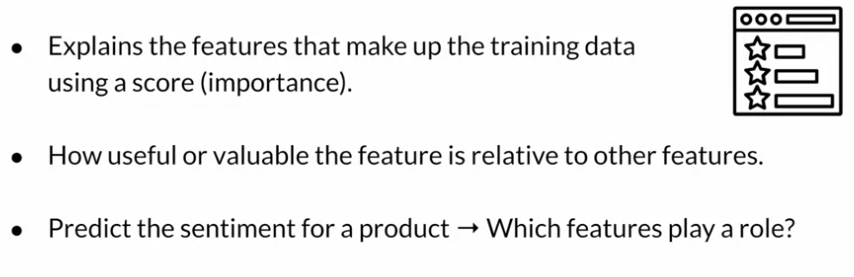

- Özellik önemi, SHAP olarak adlandırılan çok popüler bir açık kaynaklı frameworke dayanır. SHAP, "Shapley Additive Explanations" ifadesinin kısaltmasıdır.

- SHAP çerçevesi, Shapley değerlerine dayanmaktadır ve Shapley değerleri oyun teorisine dayanır. SHAP'in nasıl çalıştığını anlamak için, birden fazla oyuncunun yer aldığı ve sonucun çok belirli bir kazanç veya kayıp olabileceği bir oyunu düşünün. Shapley değerleri, oyunun sonucunu oyunda yer alan bireysel oyunculara atamanıza olanak tanır. Bu kavramı makine öğrenme dünyasına çevirirseniz, aynı konsepti makine öğrenme modelinin tahminlerini açıklamak için kullanabilirsiniz. Bu durumda, bireysel oyuncular, veri kümesini oluşturan bireysel özellikler olurken, oyunun sonucu makine öğrenme modelinin tahmini olacaktır. Bu kavramı kullanarak, tahminlerin, eğitim veri kümenizi oluşturan bireysel özellik değerleriyle nasıl ilişkilendirileceğini açıklayabilirsiniz.

- SHAP çerçevesini kullanarak hem yerel hem de küresel açıklamalar sağlayabilirsiniz. Yerel açıklama, bir bireysel özelliğin nihai modele nasıl katkıda bulunduğunu göstermeye odaklanırken, küresel açıklama, veriyi bütün olarak nasıl modele katkıda bulunduğunu anlamaya yönelik daha kapsamlı bir bakış açısı sunar. SHAP çerçevesi ayrıca çok geniş kapsamlıdır; çünkü tüm olası özellik değerleri kombinasyonlarını ve makine öğrenme modeliniz için tüm olası sonuçları dikkate alır. Bu geniş kapsamlılık nedeniyle SHAP çerçevesi zaman alıcı olabilir, ancak aynı zamanda bu geniş kapsamlılık nedeniyle SHAP, tutarlılık ve yerel doğruluk konusunda size garanti sağlayabilir.

- 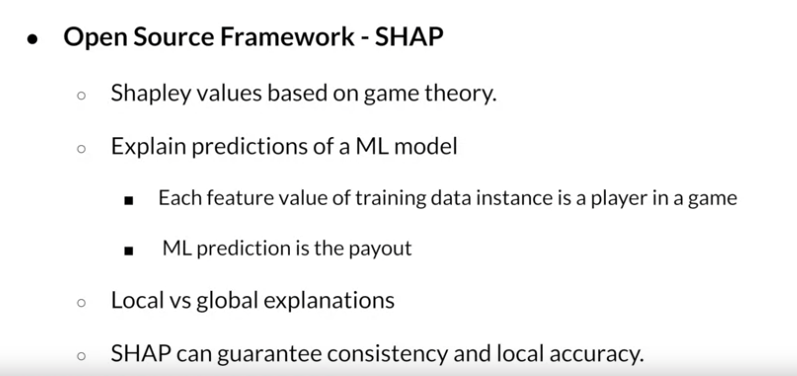


- Bu modülün özetine gelecek olursak, verilerinizin kalitesi hakkında daha iyi bir anlayış elde etmenize yardımcı olacak iki yeni kavramı öğrendik. Eğitim veri kümesindeki istatistiksel yanlılığı tespit etmek, veri kümenizin ne kadar dengesiz olabileceğine dair içgörü elde etmenize yardımcı olabilir. Data Wrangler kullanarak eğitim verilerinizdeki istatistiksel yanlılığı tespit edip bias raporları oluşturmayı öğrendik. Ayrıca, ölçeklendirilmiş bir şekilde yanlılık tespiti yapmanıza yardımcı olacak SageMaker Clarify API'sini gördük. Bu modüldeki laboratuvar egzersizinde, Clarify API'lerini kullanarak bias raporları oluşturacak ve raporu daha detaylı bir şekilde inceleyeceksiniz.

- Ayrıca, özellik önemini tanıdık ve Data Wrangler kullanarak eğitim veri kümenizdeki özellik önem raporunu nasıl oluşturacağınızı gördük. Oluşturulan rapor, eğitim veri kümenizin bireysel özelliklerinin nihai modele nasıl katkıda bulunduğuna dair içgörü sağlar.

### Bazı ek kaynaklar:
- [AWS Amazon SageMaker Documentation](https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-measure-data-bias.html)
- [SHAP Documentation](https://shap.readthedocs.io/en/latest/)

## QUIZ:
- 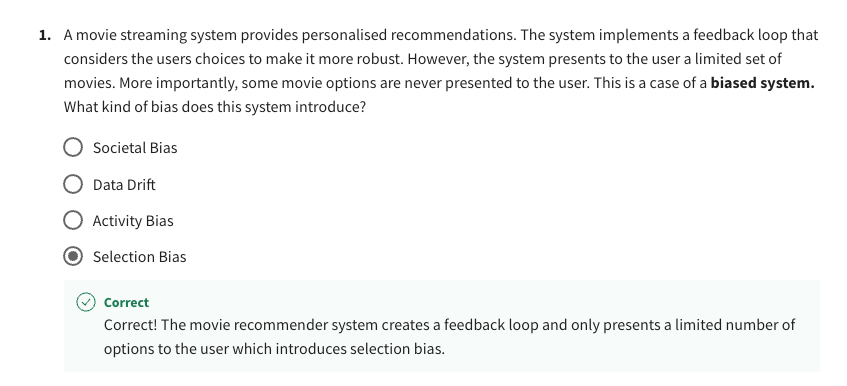

- 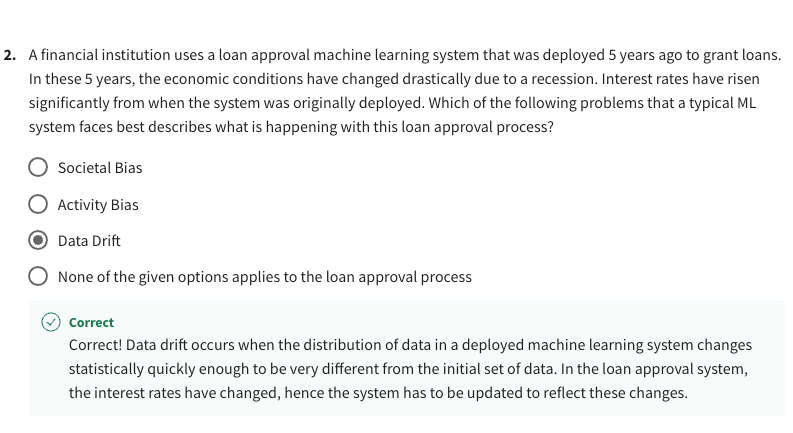

- 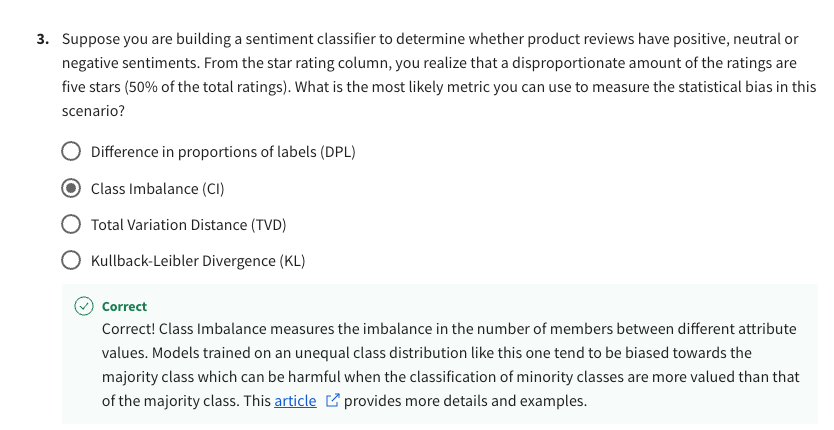

- 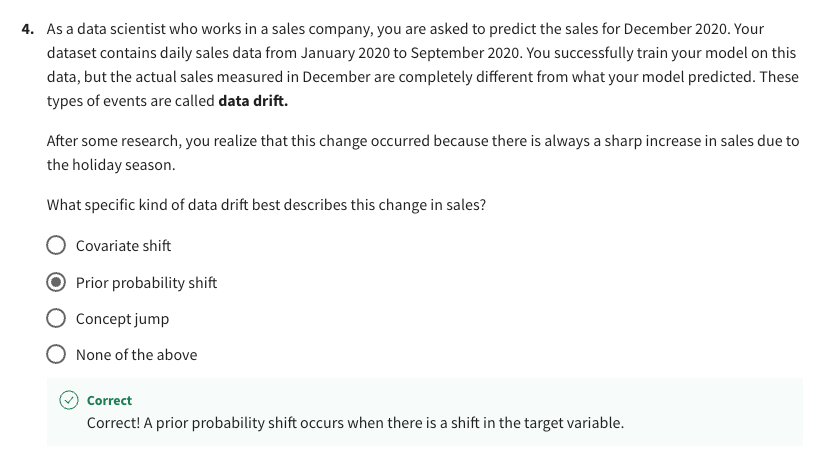

- 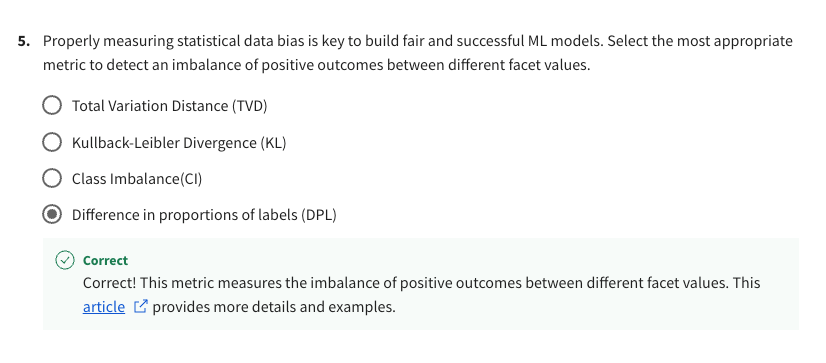

- Correct! This metric measures the imbalance of positive outcomes between different facet values. This [article](https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-measure-data-bias.html) Provides more details and examples.

- 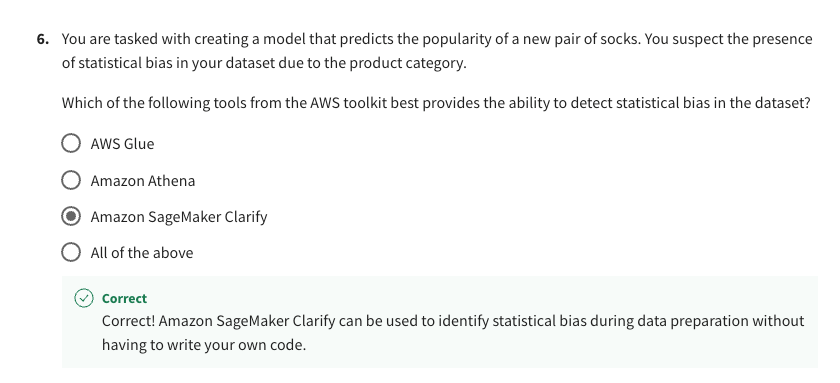

- 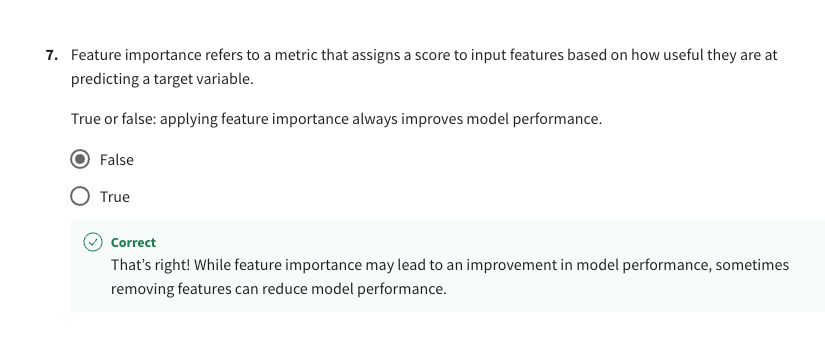
